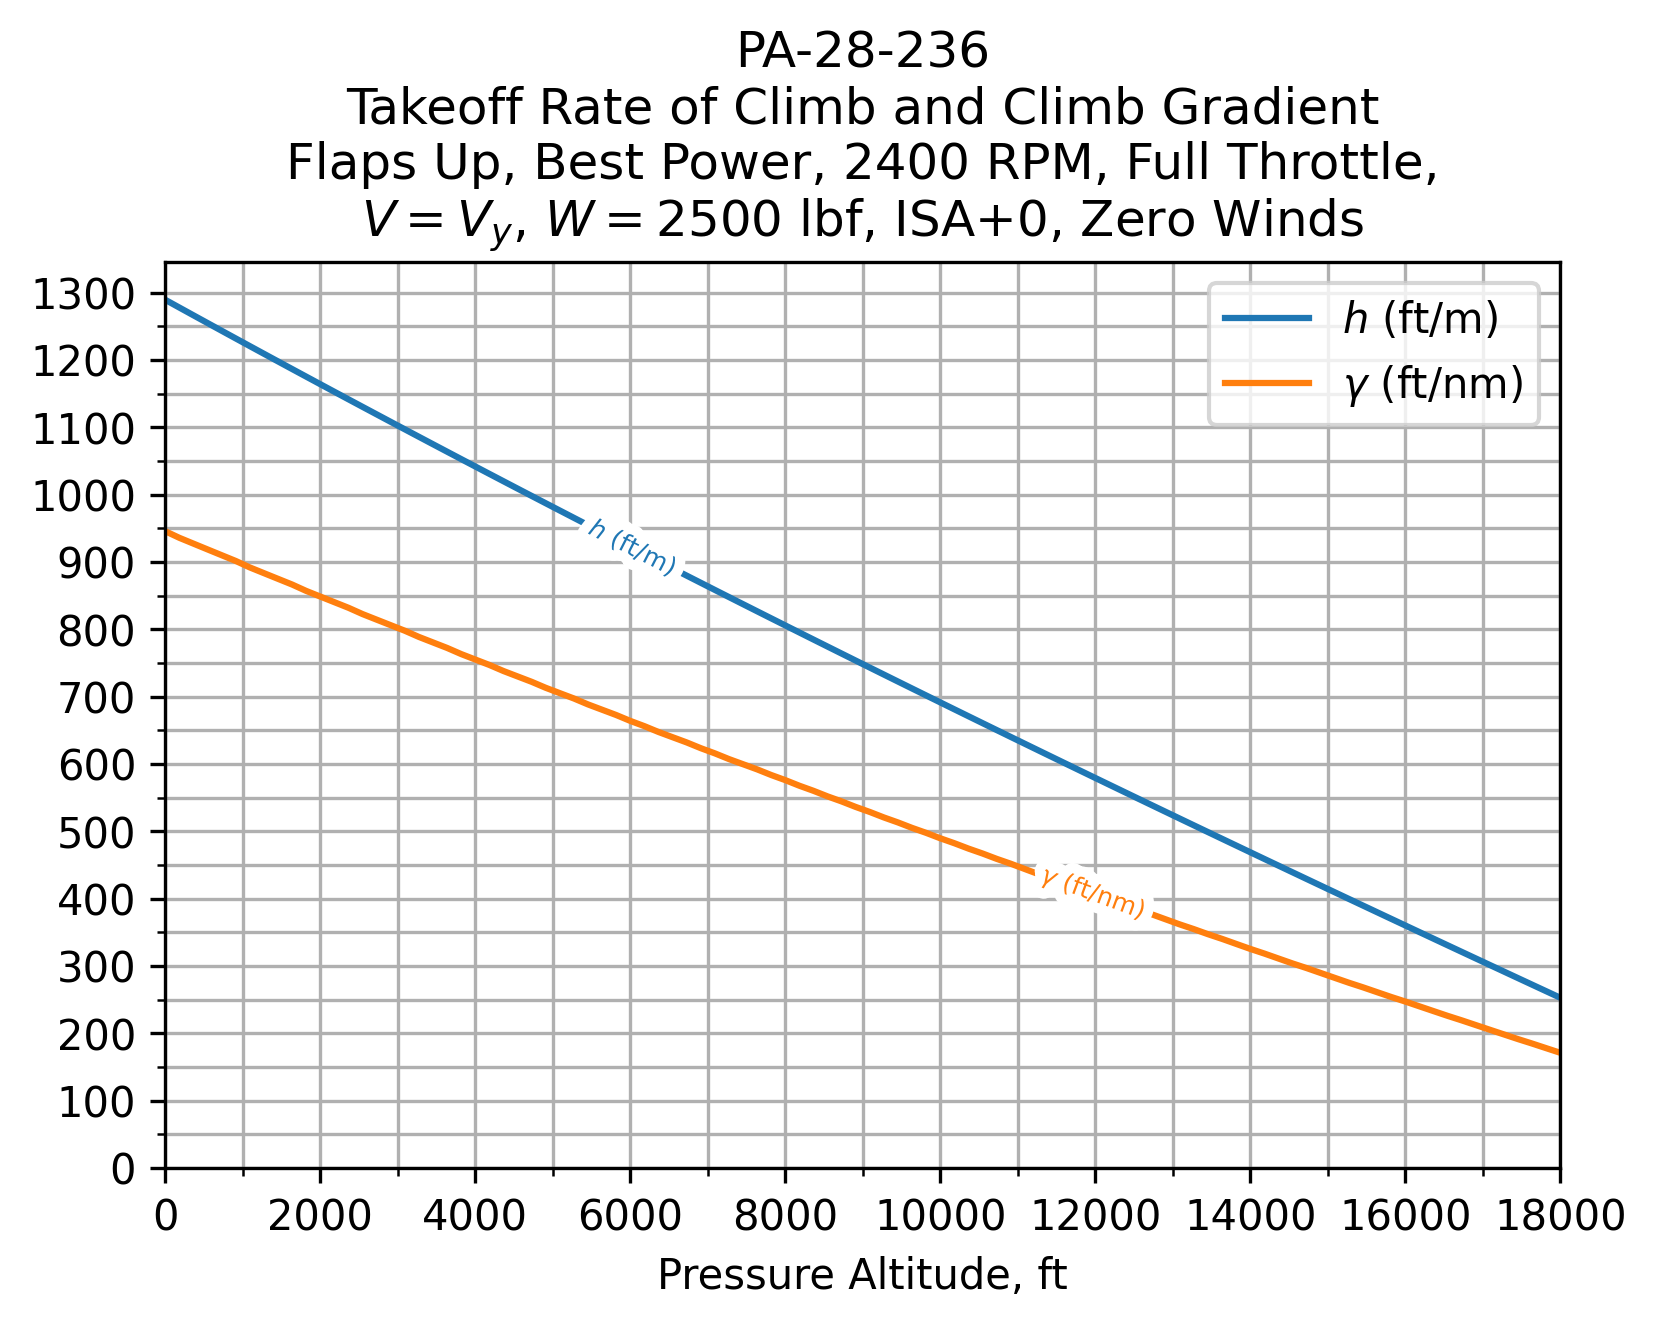

In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from labellines import labelLines
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

from examples.dakota_performance.climb_performance import best_rate_of_climb
from n51sw_dataplate import N51SW
from the_bootstrap_approach.conditions import FullThrottleConditions
from the_bootstrap_approach.equations import *
from the_bootstrap_approach.mixture import Mixture


def takeoff_climb_performance_graph(mixture, gross_aircraft_weight, isa_diff=0):
    pressure_altitude = np.linspace(0, 18000, 100)

    roc = []
    aoc = []

    for i in pressure_altitude:
        vy = best_rate_of_climb(
            N51SW,
            FullThrottleConditions(
                N51SW,
                gross_aircraft_weight,
                i,
                # Conditions expects temperature in Fahrenheit, despite ISA+X
                # notation meaning X°C.
                c_to_f(metric_standard_temperature(i) + isa_diff),
                mixture,
                2400,
            ),
        )
        roc.append(vy[3])
        aoc.append(vy[4])

    fig, ax = plt.subplots()

    ax.plot(pressure_altitude, roc, label=r"$h$ (ft/m)")
    ax.plot(pressure_altitude, aoc, label=r"$\gamma$ (ft/nm)")

    labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=6)

    ax.set(
        xlabel="Pressure Altitude, ft",
        title=(
            "PA-28-236\n"
            "Takeoff Rate of Climb and Climb Gradient\n"
            f"{N51SW.configuration}, "
            f"{mixture.value}, "
            f"2400 RPM, "
            f"Full Throttle,\n"
            f"$V = V_y$, "
            f"$W = {gross_aircraft_weight}$ lbf, "
            f"ISA{isa_diff:+}, "
            f"Zero Winds"
        ),
    )

    ax.grid(True, which="both")

    ax.xaxis.set_major_locator(MultipleLocator(2000))
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))

    ax.yaxis.set_major_locator(MultipleLocator(100))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))

    ax.set_xlim([0, 18000])
    ax.set_ylim(bottom=0)

    plt.legend()

    fig.set(dpi=300)
    plt.show()


takeoff_climb_performance_graph(Mixture.BEST_POWER, 2500, isa_diff=0)